In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('playground-series-s5e2/train.csv')

In [3]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [7]:
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [7]:
df.shape

(300000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [11]:
df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [13]:
df.isna().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [15]:
df['missing_values'] = df.isna().sum(axis=1)

In [17]:
df['missing_values'].value_counts()

0    246686
1     49756
2      3263
3       263
4        32
Name: missing_values, dtype: int64

In [107]:
df[df['missing_values']==1].isna().sum()

id                         0
Brand                   8311
Material                7260
Size                    5920
Compartments               0
Laptop Compartment      6564
Waterproof              6328
Style                   7006
Color                   8367
Weight Capacity (kg)       0
Price                      0
missing_values             0
dtype: int64

In [101]:
df.dropna().shape

(246686, 11)

In [21]:
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [23]:
df['Brand'].value_counts()

Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: Brand, dtype: int64

In [25]:
df['Material'].value_counts()

Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: Material, dtype: int64

In [27]:
df['Size'].value_counts()

Medium    101906
Large      98643
Small      92856
Name: Size, dtype: int64

In [29]:
df['Compartments'].value_counts()

1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28909
6.0     27240
Name: Compartments, dtype: int64

In [31]:
df['Laptop Compartment'].value_counts()

Yes    148342
No     144214
Name: Laptop Compartment, dtype: int64

In [33]:
df['Waterproof'].value_counts()

Yes    148077
No     144873
Name: Waterproof, dtype: int64

In [35]:
df['Style'].value_counts()

Messenger    100031
Tote          97438
Backpack      94561
Name: Style, dtype: int64

In [37]:
df['Color'].value_counts()

Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
Name: Color, dtype: int64

In [39]:
df['Weight Capacity (kg)'].value_counts()

5.000000     4286
30.000000     185
11.898250     123
22.898382     116
14.908437     101
             ... 
6.938551        1
8.093085        1
22.013824       1
13.246538       1
6.175738        1
Name: Weight Capacity (kg), Length: 181596, dtype: int64

In [41]:
df['Weight Capacity (kg)'].nunique()

181596

In [43]:
df['Weight Capacity (kg)'].max()

30.0

In [45]:
df['Weight Capacity (kg)'].min()

5.0

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns

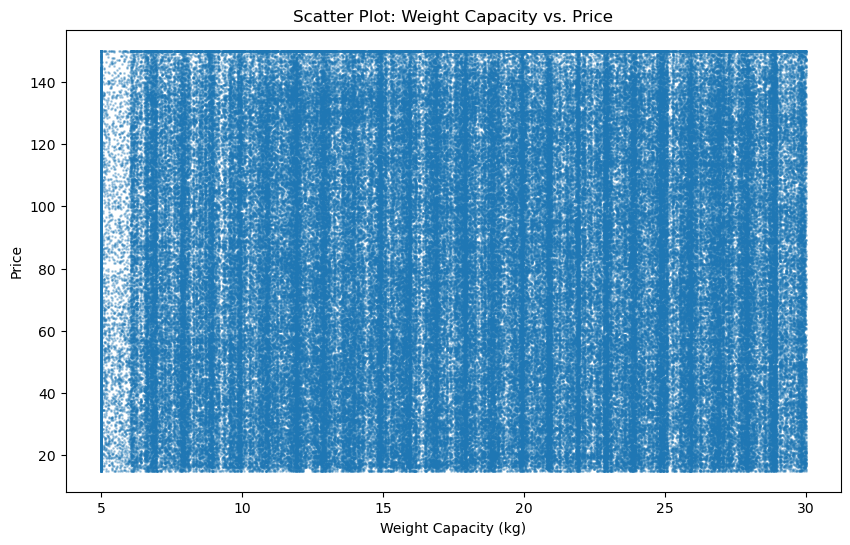

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight Capacity (kg)'], df['Price'], alpha=0.3, s=1)  # alpha for transparency, s for small points
plt.xlabel("Weight Capacity (kg)")
plt.ylabel("Price")
plt.title("Scatter Plot: Weight Capacity vs. Price")
plt.show()


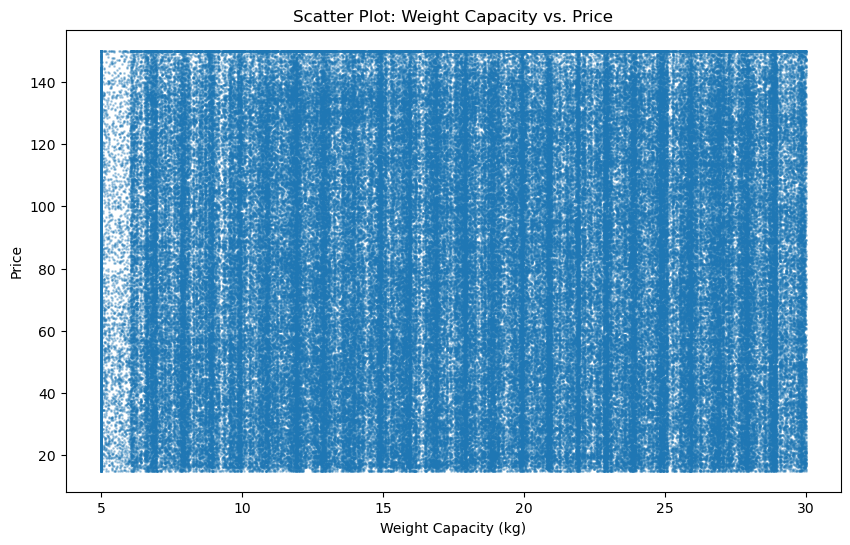

In [81]:
df['Brand'].value_counts()

Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: Brand, dtype: int64

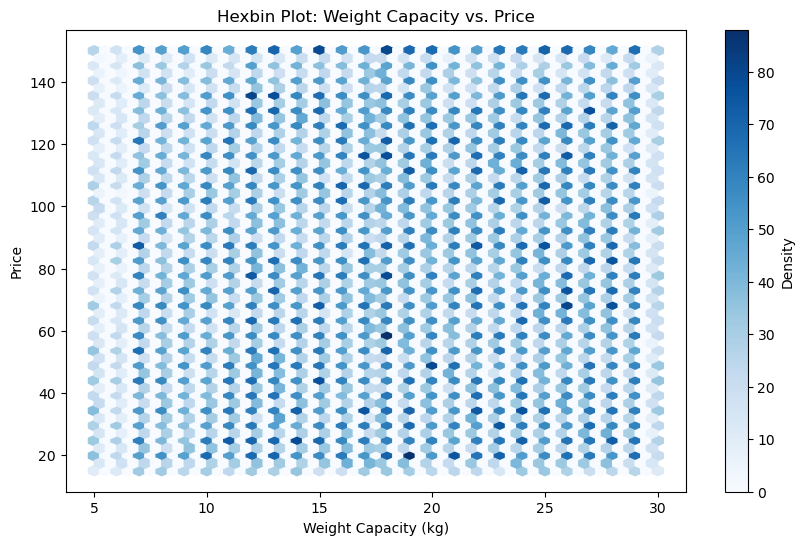

In [93]:
brand = 'Nike'
x = df[df['Brand']==brand]['Weight Capacity (kg)'].round()
y = df[df['Brand']==brand]['Price']


plt.figure(figsize=(10, 6))
plt.hexbin(x, y, gridsize=50, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel("Weight Capacity (kg)")
plt.ylabel("Price")
plt.title("Hexbin Plot: Weight Capacity vs. Price")
plt.show()


<Figure size 1000x600 with 0 Axes>

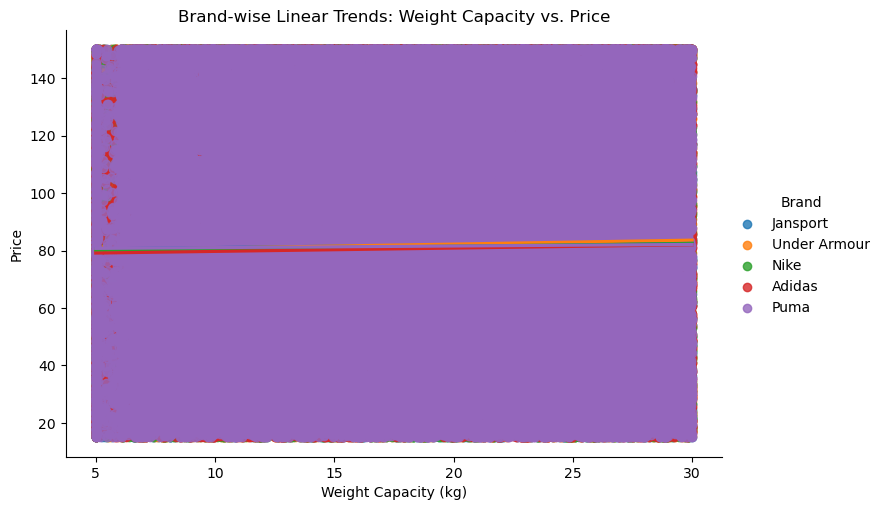

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x="Weight Capacity (kg)", y="Price", hue="Brand", aspect=1.5)
plt.title("Brand-wise Linear Trends: Weight Capacity vs. Price")
plt.show()


ValueError: autodetected range of [nan, nan] is not finite

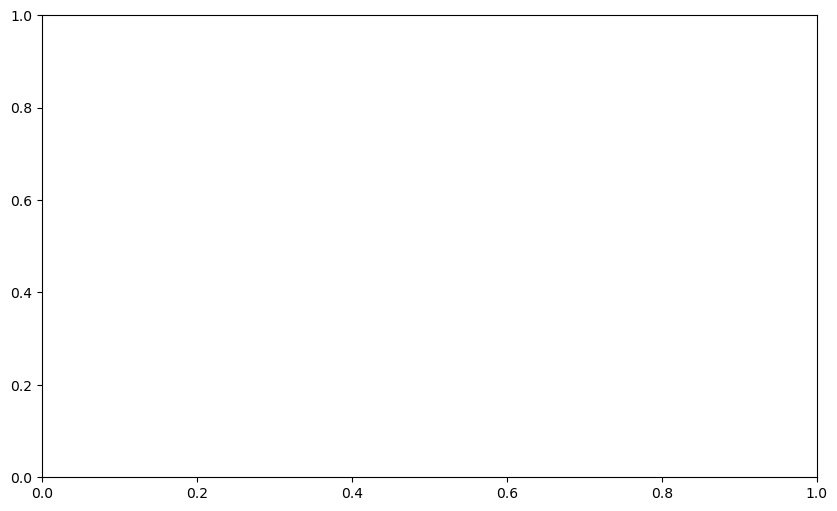

In [95]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist2d(df['Weight Capacity (kg)'], df['Price'], bins=(100, 100), cmap="Blues")
plt.colorbar(label="Frequency")
plt.xlabel("Weight Capacity (kg)")
plt.ylabel("Price")
plt.title("2D Histogram: Weight Capacity vs. Price")
plt.show()


In [109]:
df_test = pd.read_csv('playground-series-s5e2/test.csv')

In [111]:
df_test.isna().sum()

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [ ]:
df_test